In [1]:
import cPickle as pickle
author_full_name_dict = pickle.load(open("authors_full_name_dict.p", "rb"))

In [2]:
import sqlite3
conng = sqlite3.connect('pmcv1-graph.db') 
cg = conng.cursor()

In [3]:
import Queue
import networkx as nx
def buildfnauthortree(rootnode, mastergraphcursor, fndict, depth = 2):
    _g =nx.DiGraph()
    q = Queue.Queue()
    q.put((rootnode, 0))
    while not q.empty():
        node = q.get()
        if node[1] < depth:
            mastergraphcursor.execute('''SELECT coauthors FROM coauthors WHERE author = ?''', [node[0]])
            coauthors = cg.fetchone()[0].split(',')
            for author in coauthors:
                if unicode(fndict[author][0]+" "+fndict[author][1]) not in _g.nodes():
                    _g.add_edge(unicode(fndict[node[0]][0]+ " "+fndict[node[0]][1]), 
                                unicode(fndict[author][0]+" "+fndict[author][1]))
                    q.put((author, node[1]+1))
    return _g

In [19]:
rootauthor = u'padubidriv.shivaprasad'
g = buildfnauthortree(rootauthor, cg, author_full_name_dict, 2)

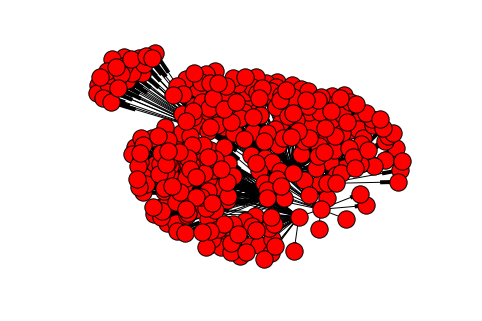

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
nx.draw(g)

In [21]:
#dump graph in json format for d3 to plot
from networkx.readwrite import json_graph
import io, json
with io.open('testgraphdata.json', 'w', encoding='utf-8') as f:
    f.write(unicode(json.dumps(json_graph.tree_data(g, u"Padubidri V. Shivaprasad", 
                                                    attrs={'children': 'children', 'id': 'name'}))))